## Comparative border and non border county in the U.S. 

We analyze how employment, wages and population in U.S. evolved between 2007 and 2021. Also between 2016 and 2021

The border counties are:  San Diego (CA), Imperial (CA), Yuma (AZ), Pima (AZ), Santa Cruz (AZ), Cochise (AZ), Hidalgo (NM), Luna (NM) , Doña Ana (NM), El Paso (TX), Hudspeth (TX) , Jeff Davis (TX),  Presidio(TX),  Brewster(TX), Terrell (TX) , Val Verde(TX),  Kinney(TX) , Maverick(TX),  Webb(TX) , Zapata(TX),  Starr(TX) , Hidalgo(TX) ,  Cameron(TX)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [3]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
## open data
df = pd.read_csv("data/jobs-wages-population-us-merged-by-county.csv")
df

,Year,County,State,Description,Value,Border State,Border County
0,2007,Autauga,Alabama,Total Jobs,"14,956.00",No,No
1,2007,Baldwin,Alabama,Total Jobs,"81,452.00",No,No
2,2007,Barbour,Alabama,Total Jobs,"11,323.00",No,No
3,2007,Bibb,Alabama,Total Jobs,"4,885.00",No,No
4,2007,Blount,Alabama,Total Jobs,"11,974.00",No,No
...,...,...,...,...,...,...,...
420640,2021,Sweetwater,Wyoming,Population,"41,614.00",No,No
420641,2021,Teton,Wyoming,Population,"23,575.00",No,No
420642,2021,Uinta,Wyoming,Population,"20,635.00",No,No
420643,2021,Washakie,Wyoming,Population,"7,705.00",No,No


In [5]:
year = df["Year"].unique

In [6]:
df["Description"].unique()

array(['Total Jobs', 'Construction Jobs', 'Manufacturing Jobs',
       'Transportation Jobs', 'Total Income', 'Construction Income',
       'Manufacturing Income', 'Transportation Income', 'Population'],
      dtype=object)

In [78]:
dfpivot_border_bor = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes' &  `Border State` == 'Yes'") , values='Value', index='Year', columns='Description')
dfpivot_border_bor
dfpivot_border_cal = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes' & State =='California'") , values='Value', index='Year', columns='Description')
dfpivot_border_cal
dfpivot_border_nm = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes' & State =='New Mexico'") , values='Value', index='Year', columns='Description')
dfpivot_border_nm
dfpivot_border_ar = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes' & State =='Arizona'") , values='Value', index='Year', columns='Description')
dfpivot_border_ar
dfpivot_border_tx = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes' & State =='Texas'") , values='Value', index='Year', columns='Description')
dfpivot_border_tx

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs
Year,,,,,,,,,
2007,"194,271.90","6,845.90","211,879.20","4,472.30","163,602.00","3,641,260.93","59,553.29","181,919.73","5,401.64"
2008,"186,646.00","6,666.70","144,326.69","3,265.08","167,144.14","3,939,105.21","60,252.93","181,117.82","5,154.73"
2009,"195,745.20","6,376.60","163,748.50","3,811.60","170,963.50","4,085,788.50","59,812.50","174,175.73","4,923.64"
2010,"262,518.33","6,840.11","160,896.40","3,583.20","174,850.36","4,431,770.43","60,586.43","195,932.55","4,970.82"
2011,"257,644.00","6,755.22","177,481.30","3,767.10","178,015.64","4,710,583.14","63,409.71","254,465.73","5,231.00"
2012,"292,958.00","7,440.25","210,941.78","4,280.44","180,398.71","4,900,649.50","64,231.64","242,905.75","4,987.92"
2013,"252,180.50","7,541.75","214,979.56","4,386.00","181,492.29","4,963,239.64","65,694.43","246,959.73","5,441.00"
2014,"236,683.78","6,766.33","221,925.44","4,252.67","182,876.07","5,185,538.50","67,368.86","269,271.91","5,582.09"
2015,"214,145.50","5,990.30","206,697.60","3,884.40","183,743.93","5,326,358.36","68,680.71","274,209.91","5,959.73"


In [79]:
dfpivot_nonborder_bor = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No' &  `Border State` == 'Yes'") , values='Value', index='Year', columns='Description')
dfpivot_nonborder_bor
dfpivot_nonborder_cal = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No' & State =='California'") , values='Value', index='Year', columns='Description')
dfpivot_nonborder_cal
dfpivot_nonborder_nm = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No' & State =='New Mexico'") , values='Value', index='Year', columns='Description')
dfpivot_nonborder_nm
dfpivot_nonborder_ar = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No' & State =='Arizona'") , values='Value', index='Year', columns='Description')
dfpivot_nonborder_ar
dfpivot_nonborder_tx = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No' & State =='Texas'") , values='Value', index='Year', columns='Description')
dfpivot_nonborder_tx

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs
Year,,,,,,,,,
2007,"233,351.81","4,645.17","362,377.36","4,717.40","89,756.48","3,470,136.28","45,946.15","170,944.35","2,745.43"
2008,"247,503.26","4,857.76","326,449.32","4,180.39","91,537.59","3,816,265.51","47,175.87","185,275.45","2,835.40"
2009,"226,518.98","4,372.59","329,635.84","4,330.56","93,367.80","3,613,095.46","46,274.14","188,214.13","2,785.10"
2010,"234,760.85","4,212.32","341,316.36","4,244.79","94,962.32","3,846,334.70","46,368.28","202,255.64","2,709.16"
2011,"248,288.71","4,246.05","371,658.16","4,309.30","96,407.68","4,214,396.33","48,068.96","205,992.41","2,833.36"
2012,"293,203.80","4,450.70","387,513.08","4,472.48","98,042.64","4,517,150.55","49,833.80","218,938.64","2,858.75"
2013,"318,166.01","4,729.35","392,981.91","4,586.33","99,571.97","4,647,313.17","51,512.55","196,796.99","2,953.03"
2014,"348,863.25","4,899.11","421,732.08","4,632.98","101,448.39","5,008,497.18","53,334.17","209,868.11","3,131.10"
2015,"359,644.56","4,922.00","445,214.85","4,508.10","103,444.40","5,108,087.84","54,869.07","229,716.00","3,413.56"


In [80]:
#Calculate percentage changes border
dfchange_border_bor = dfpivot_border_bor.copy()
dfchange_border_bor['Construction Jobs'] = dfchange_border_bor['Construction Jobs'] / dfchange_border_bor['Construction Jobs'].iat[0] * 100 
dfchange_border_bor['Construction Income'] = dfchange_border_bor['Construction Income'] / dfchange_border_bor['Construction Income'].iat[0] * 100
dfchange_border_bor["Manufacturing Jobs"] = dfchange_border_bor["Manufacturing Jobs"] / dfchange_border_bor["Manufacturing Jobs"].iat[0] * 100
dfchange_border_bor["Manufacturing Income"] = dfchange_border_bor["Manufacturing Income"] / dfchange_border_bor["Manufacturing Income"].iat[0] * 100
dfchange_border_bor["Transportation Jobs"]= dfchange_border_bor["Transportation Jobs"] / dfchange_border_bor["Transportation Jobs"].iat[0] * 100
dfchange_border_bor["Transportation Income"] = dfchange_border_bor["Transportation Income"] / dfchange_border_bor["Transportation Income"].iat[0] * 100
dfchange_border_bor["Population"] = dfchange_border_bor["Population"] / dfchange_border_bor["Population"].iat[0] * 100
dfchange_border_bor["Total Jobs"] = dfchange_border_bor["Total Jobs"] / dfchange_border_bor["Total Jobs"].iat[0] * 100 
dfchange_border_bor["Total Income"]  = dfchange_border_bor["Total Income"] / dfchange_border_bor["Total Income"].iat[0] * 100
dfchange_border_bor["Year"] = dfchange_border_cal.index

In [81]:
#Calculate percentage changes border
dfchange_border_cal = dfpivot_border_cal.copy()
dfchange_border_cal['Construction Jobs'] = dfchange_border_cal['Construction Jobs'] / dfchange_border_cal['Construction Jobs'].iat[0] * 100 
dfchange_border_cal['Construction Income'] = dfchange_border_cal['Construction Income'] / dfchange_border_cal['Construction Income'].iat[0] * 100
dfchange_border_cal["Manufacturing Jobs"] = dfchange_border_cal["Manufacturing Jobs"] / dfchange_border_cal["Manufacturing Jobs"].iat[0] * 100
dfchange_border_cal["Manufacturing Income"] = dfchange_border_cal["Manufacturing Income"] / dfchange_border_cal["Manufacturing Income"].iat[0] * 100
dfchange_border_cal["Transportation Jobs"]= dfchange_border_cal["Transportation Jobs"] / dfchange_border_cal["Transportation Jobs"].iat[0] * 100
dfchange_border_cal["Transportation Income"] = dfchange_border_cal["Transportation Income"] / dfchange_border_cal["Transportation Income"].iat[0] * 100
dfchange_border_cal["Population"] = dfchange_border_cal["Population"] / dfchange_border_cal["Population"].iat[0] * 100
dfchange_border_cal["Total Jobs"] = dfchange_border_cal["Total Jobs"] / dfchange_border_cal["Total Jobs"].iat[0] * 100 
dfchange_border_cal["Total Income"]  = dfchange_border_cal["Total Income"] / dfchange_border_cal["Total Income"].iat[0] * 100
dfchange_border_cal["Year"] = dfchange_border_cal.index

In [120]:
#Calculate percentage changes border
dfchange_border_nm = dfpivot_border_nm.copy()
dfchange_border_nm['Construction Jobs'] = dfchange_border_nm['Construction Jobs'] / dfchange_border_nm['Construction Jobs'].iat[0] * 100 
dfchange_border_nm['Construction Income'] = dfchange_border_nm['Construction Income'] / dfchange_border_nm['Construction Income'].iat[0] * 100
dfchange_border_nm["Manufacturing Jobs"] = dfchange_border_nm["Manufacturing Jobs"] / dfchange_border_nm["Manufacturing Jobs"].iat[0] * 100
dfchange_border_nm["Manufacturing Income"] = dfchange_border_nm["Manufacturing Income"] / dfchange_border_nm["Manufacturing Income"].iat[0] * 100
dfchange_border_nm["Transportation Jobs"]= dfchange_border_nm["Transportation Jobs"] / dfchange_border_nm["Transportation Jobs"].iat[0] * 100
dfchange_border_nm["Transportation Income"] = dfchange_border_nm["Transportation Income"] / dfchange_border_nm["Transportation Income"].iat[0] * 100
dfchange_border_nm["Population"] = dfchange_border_nm["Population"] / dfchange_border_nm["Population"].iat[0] * 100
dfchange_border_nm["Total Jobs"] = dfchange_border_nm["Total Jobs"] / dfchange_border_nm["Total Jobs"].iat[0] * 100 
dfchange_border_nm["Total Income"]  = dfchange_border_nm["Total Income"] / dfchange_border_nm["Total Income"].iat[0] * 100
dfchange_border_nm["Year"] = dfchange_border_nm.index

In [121]:
#Calculate percentage changes border
dfchange_border_ar = dfpivot_border_ar.copy()
dfchange_border_ar['Construction Jobs'] = dfchange_border_ar['Construction Jobs'] / dfchange_border_ar['Construction Jobs'].iat[0] * 100 
dfchange_border_ar['Construction Income'] = dfchange_border_ar['Construction Income'] / dfchange_border_ar['Construction Income'].iat[0] * 100
dfchange_border_ar["Manufacturing Jobs"] = dfchange_border_ar["Manufacturing Jobs"] / dfchange_border_ar["Manufacturing Jobs"].iat[0] * 100
dfchange_border_ar["Manufacturing Income"] = dfchange_border_ar["Manufacturing Income"] / dfchange_border_ar["Manufacturing Income"].iat[0] * 100
dfchange_border_ar["Transportation Jobs"]= dfchange_border_ar["Transportation Jobs"] / dfchange_border_ar["Transportation Jobs"].iat[0] * 100
dfchange_border_ar["Transportation Income"] = dfchange_border_ar["Transportation Income"] / dfchange_border_ar["Transportation Income"].iat[0] * 100
dfchange_border_ar["Population"] = dfchange_border_ar["Population"] / dfchange_border_ar["Population"].iat[0] * 100
dfchange_border_ar["Total Jobs"] = dfchange_border_ar["Total Jobs"] / dfchange_border_ar["Total Jobs"].iat[0] * 100 
dfchange_border_ar["Total Income"]  = dfchange_border_ar["Total Income"] / dfchange_border_ar["Total Income"].iat[0] * 100
dfchange_border_ar["Year"] = dfchange_border_ar.index

In [122]:
#Calculate percentage changes border
dfchange_border_tx = dfpivot_border_tx.copy()
dfchange_border_tx['Construction Jobs'] = dfchange_border_tx['Construction Jobs'] / dfchange_border_tx['Construction Jobs'].iat[0] * 100 
dfchange_border_tx['Construction Income'] = dfchange_border_tx['Construction Income'] / dfchange_border_tx['Construction Income'].iat[0] * 100
dfchange_border_tx["Manufacturing Jobs"] = dfchange_border_tx["Manufacturing Jobs"] / dfchange_border_tx["Manufacturing Jobs"].iat[0] * 100
dfchange_border_tx["Manufacturing Income"] = dfchange_border_tx["Manufacturing Income"] / dfchange_border_tx["Manufacturing Income"].iat[0] * 100
dfchange_border_tx["Transportation Jobs"]= dfchange_border_tx["Transportation Jobs"] / dfchange_border_tx["Transportation Jobs"].iat[0] * 100
dfchange_border_tx["Transportation Income"] = dfchange_border_tx["Transportation Income"] / dfchange_border_tx["Transportation Income"].iat[0] * 100
dfchange_border_tx["Population"] = dfchange_border_tx["Population"] / dfchange_border_tx["Population"].iat[0] * 100
dfchange_border_tx["Total Jobs"] = dfchange_border_tx["Total Jobs"] / dfchange_border_tx["Total Jobs"].iat[0] * 100 
dfchange_border_tx["Total Income"]  = dfchange_border_tx["Total Income"] / dfchange_border_tx["Total Income"].iat[0] * 100
dfchange_border_tx["Year"] = dfchange_border_tx.index

In [123]:
#Calculate percentage changes non border
dfchange_nonborder_bor = dfpivot_nonborder_bor.copy()
dfchange_nonborder_bor['Construction Jobs'] = dfchange_nonborder_bor['Construction Jobs'] / dfchange_nonborder_bor['Construction Jobs'].iat[0] * 100 
dfchange_nonborder_bor['Construction Income'] = dfchange_nonborder_bor['Construction Income'] / dfchange_nonborder_bor['Construction Income'].iat[0] * 100
dfchange_nonborder_bor["Manufacturing Jobs"] = dfchange_nonborder_bor["Manufacturing Jobs"] / dfchange_nonborder_bor["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder_bor["Manufacturing Income"] = dfchange_nonborder_bor["Manufacturing Income"] / dfchange_nonborder_bor["Manufacturing Income"].iat[0] * 100
dfchange_nonborder_bor["Transportation Jobs"]= dfchange_nonborder_bor["Transportation Jobs"] / dfchange_nonborder_bor["Transportation Jobs"].iat[0] * 100
dfchange_nonborder_bor["Transportation Income"] = dfchange_nonborder_bor["Transportation Income"] / dfchange_nonborder_bor["Transportation Income"].iat[0] * 100
dfchange_nonborder_bor["Population"] = dfchange_nonborder_bor["Population"] / dfchange_nonborder_bor["Population"].iat[0] * 100
dfchange_nonborder_bor["Total Jobs"] = dfchange_nonborder_bor["Total Jobs"] / dfchange_nonborder_bor["Total Jobs"].iat[0] * 100 
dfchange_nonborder_bor["Total Income"]  = dfchange_nonborder_bor["Total Income"] / dfchange_nonborder_bor["Total Income"].iat[0] * 100
dfchange_nonborder_bor["Year"] = dfchange_nonborder_bor.index

In [124]:
#Calculate percentage changes non border
dfchange_nonborder_cal = dfpivot_nonborder_cal.copy()
dfchange_nonborder_cal['Construction Jobs'] = dfchange_nonborder_cal['Construction Jobs'] / dfchange_nonborder_cal['Construction Jobs'].iat[0] * 100 
dfchange_nonborder_cal['Construction Income'] = dfchange_nonborder_cal['Construction Income'] / dfchange_nonborder_cal['Construction Income'].iat[0] * 100
dfchange_nonborder_cal["Manufacturing Jobs"] = dfchange_nonborder_cal["Manufacturing Jobs"] / dfchange_nonborder_cal["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder_cal["Manufacturing Income"] = dfchange_nonborder_cal["Manufacturing Income"] / dfchange_nonborder_cal["Manufacturing Income"].iat[0] * 100
dfchange_nonborder_cal["Transportation Jobs"]= dfchange_nonborder_cal["Transportation Jobs"] / dfchange_nonborder_cal["Transportation Jobs"].iat[0] * 100
dfchange_nonborder_cal["Transportation Income"] = dfchange_nonborder_cal["Transportation Income"] / dfchange_nonborder_cal["Transportation Income"].iat[0] * 100
dfchange_nonborder_cal["Population"] = dfchange_nonborder_cal["Population"] / dfchange_nonborder_cal["Population"].iat[0] * 100
dfchange_nonborder_cal["Total Jobs"] = dfchange_nonborder_cal["Total Jobs"] / dfchange_nonborder_cal["Total Jobs"].iat[0] * 100 
dfchange_nonborder_cal["Total Income"]  = dfchange_nonborder_cal["Total Income"] / dfchange_nonborder_cal["Total Income"].iat[0] * 100
dfchange_nonborder_cal["Year"] = dfchange_nonborder_cal.index

In [125]:
#Calculate percentage changes non border
dfchange_nonborder_ar = dfpivot_nonborder_ar.copy()
dfchange_nonborder_ar['Construction Jobs'] = dfchange_nonborder_ar['Construction Jobs'] / dfchange_nonborder_ar['Construction Jobs'].iat[0] * 100 
dfchange_nonborder_ar['Construction Income'] = dfchange_nonborder_ar['Construction Income'] / dfchange_nonborder_ar['Construction Income'].iat[0] * 100
dfchange_nonborder_ar["Manufacturing Jobs"] = dfchange_nonborder_ar["Manufacturing Jobs"] / dfchange_nonborder_ar["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder_ar["Manufacturing Income"] = dfchange_nonborder_ar["Manufacturing Income"] / dfchange_nonborder_ar["Manufacturing Income"].iat[0] * 100
dfchange_nonborder_ar["Transportation Jobs"]= dfchange_nonborder_ar["Transportation Jobs"] / dfchange_nonborder_ar["Transportation Jobs"].iat[0] * 100
dfchange_nonborder_ar["Transportation Income"] = dfchange_nonborder_ar["Transportation Income"] / dfchange_nonborder_ar["Transportation Income"].iat[0] * 100
dfchange_nonborder_ar["Population"] = dfchange_nonborder_ar["Population"] / dfchange_nonborder_ar["Population"].iat[0] * 100
dfchange_nonborder_ar["Total Jobs"] = dfchange_nonborder_ar["Total Jobs"] / dfchange_nonborder_ar["Total Jobs"].iat[0] * 100 
dfchange_nonborder_ar["Total Income"]  = dfchange_nonborder_ar["Total Income"] / dfchange_nonborder_ar["Total Income"].iat[0] * 100
dfchange_nonborder_ar["Year"] = dfchange_nonborder_ar.index

In [126]:
#Calculate percentage changes non border
dfchange_nonborder_nm = dfpivot_nonborder_nm.copy()
dfchange_nonborder_nm['Construction Jobs'] = dfchange_nonborder_nm['Construction Jobs'] / dfchange_nonborder_nm['Construction Jobs'].iat[0] * 100 
dfchange_nonborder_nm['Construction Income'] = dfchange_nonborder_nm['Construction Income'] / dfchange_nonborder_nm['Construction Income'].iat[0] * 100
dfchange_nonborder_nm["Manufacturing Jobs"] = dfchange_nonborder_nm["Manufacturing Jobs"] / dfchange_nonborder_nm["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder_nm["Manufacturing Income"] = dfchange_nonborder_nm["Manufacturing Income"] / dfchange_nonborder_nm["Manufacturing Income"].iat[0] * 100
dfchange_nonborder_nm["Transportation Jobs"]= dfchange_nonborder_nm["Transportation Jobs"] / dfchange_nonborder_nm["Transportation Jobs"].iat[0] * 100
dfchange_nonborder_nm["Transportation Income"] = dfchange_nonborder_nm["Transportation Income"] / dfchange_nonborder_nm["Transportation Income"].iat[0] * 100
dfchange_nonborder_nm["Population"] = dfchange_nonborder_nm["Population"] / dfchange_nonborder_nm["Population"].iat[0] * 100
dfchange_nonborder_nm["Total Jobs"] = dfchange_nonborder_nm["Total Jobs"] / dfchange_nonborder_nm["Total Jobs"].iat[0] * 100 
dfchange_nonborder_nm["Total Income"]  = dfchange_nonborder_nm["Total Income"] / dfchange_nonborder_nm["Total Income"].iat[0] * 100
dfchange_nonborder_nm["Year"] = dfchange_nonborder_nm.index

In [127]:
#Calculate percentage changes non border
dfchange_nonborder_tx = dfpivot_nonborder_tx.copy()
dfchange_nonborder_tx['Construction Jobs'] = dfchange_nonborder_tx['Construction Jobs'] / dfchange_nonborder_tx['Construction Jobs'].iat[0] * 100 
dfchange_nonborder_tx['Construction Income'] = dfchange_nonborder_tx['Construction Income'] / dfchange_nonborder_tx['Construction Income'].iat[0] * 100
dfchange_nonborder_tx["Manufacturing Jobs"] = dfchange_nonborder_tx["Manufacturing Jobs"] / dfchange_nonborder_tx["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder_tx["Manufacturing Income"] = dfchange_nonborder_tx["Manufacturing Income"] / dfchange_nonborder_tx["Manufacturing Income"].iat[0] * 100
dfchange_nonborder_tx["Transportation Jobs"]= dfchange_nonborder_tx["Transportation Jobs"] / dfchange_nonborder_tx["Transportation Jobs"].iat[0] * 100
dfchange_nonborder_tx["Transportation Income"] = dfchange_nonborder_tx["Transportation Income"] / dfchange_nonborder_tx["Transportation Income"].iat[0] * 100
dfchange_nonborder_tx["Population"] = dfchange_nonborder_tx["Population"] / dfchange_nonborder_tx["Population"].iat[0] * 100
dfchange_nonborder_tx["Total Jobs"] = dfchange_nonborder_tx["Total Jobs"] / dfchange_nonborder_tx["Total Jobs"].iat[0] * 100 
dfchange_nonborder_tx["Total Income"]  = dfchange_nonborder_tx["Total Income"] / dfchange_nonborder_tx["Total Income"].iat[0] * 100
dfchange_nonborder_tx["Year"] = dfchange_nonborder_tx.index

In [128]:
df_melted_border_bor = pd.melt(dfchange_border_bor, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_border_bor ["Value"] = df_melted_border_bor ["Value"] -100
df_melted_nonborder_bor = pd.melt(dfchange_nonborder_bor, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_nonborder_bor ["Value"] = df_melted_nonborder_bor ["Value"] -100

In [129]:
df_melted_border_cal = pd.melt(dfchange_border_cal, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_border_cal ["Value"] = df_melted_border_cal ["Value"] -100
df_melted_nonborder_cal = pd.melt(dfchange_nonborder_cal, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_nonborder_cal ["Value"] = df_melted_nonborder_cal ["Value"] -100

In [130]:
df_melted_border_ar = pd.melt(dfchange_border_ar, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_border_ar ["Value"] = df_melted_border_ar ["Value"] -100
df_melted_nonborder_ar = pd.melt(dfchange_nonborder_ar, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_nonborder_ar ["Value"] = df_melted_nonborder_ar ["Value"] -100

In [131]:
df_melted_border_nm = pd.melt(dfchange_border_nm, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_border_nm ["Value"] = df_melted_border_nm ["Value"] -100
df_melted_nonborder_nm = pd.melt(dfchange_nonborder_nm, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_nonborder_nm ["Value"] = df_melted_nonborder_nm ["Value"] -100

In [132]:
df_melted_border_tx = pd.melt(dfchange_border_tx, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_border_tx ["Value"] = df_melted_border_tx ["Value"] -100
df_melted_nonborder_tx = pd.melt(dfchange_nonborder_tx, id_vars='Year', var_name='Description', value_name='Value').query("Year == 2021")
df_melted_nonborder_tx ["Value"] = df_melted_nonborder_tx ["Value"] -100

In [133]:
dfsummary_bor = pd.merge(df_melted_border_bor,df_melted_nonborder_bor, on = ["Year", "Description"])
dfsummary_bor.rename(columns = {"Value_x": "Border","Value_y": "Non Border"}, inplace = True)

In [134]:
dfsummary_cal = pd.merge(df_melted_border_cal,df_melted_nonborder_cal, on = ["Year", "Description"])
dfsummary_cal.rename(columns = {"Value_x": "Border","Value_y": "Non Border"}, inplace = True)

In [135]:
dfsummary_ar = pd.merge(df_melted_border_ar,df_melted_nonborder_ar, on = ["Year", "Description"])
dfsummary_ar.rename(columns = {"Value_x": "Border","Value_y": "Non Border"}, inplace = True)

In [136]:
dfsummary_nm = pd.merge(df_melted_border_nm,df_melted_nonborder_nm, on = ["Year", "Description"])
dfsummary_nm.rename(columns = {"Value_x": "Border","Value_y": "Non Border"}, inplace = True)

In [137]:
dfsummary_tx = pd.merge(df_melted_border_tx,df_melted_nonborder_tx, on = ["Year", "Description"])
dfsummary_tx.rename(columns = {"Value_x": "Border","Value_y": "Non Border"}, inplace = True)

In [138]:
dfsummary_cal

,Year,Description,Border,Non Border
0,2021,Construction Income,15.47,38.03
1,2021,Construction Jobs,-3.44,1.45
2,2021,Manufacturing Income,68.22,50.82
3,2021,Manufacturing Jobs,10.93,-11.29
4,2021,Population,10.02,8.06
5,2021,Total Income,81.84,92.12
6,2021,Total Jobs,14.77,17.02
7,2021,Transportation Income,16.56,118.46
8,2021,Transportation Jobs,79.38,101.87


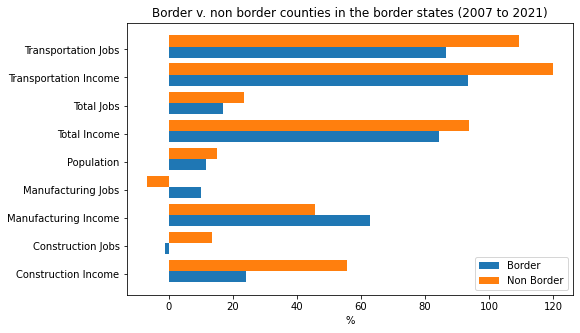

In [139]:
# Datos de las series 
serie1 = dfsummary_bor['Border']
serie2 = dfsummary_bor['Non Border']

# Crear los índices para las barras
ind = np.arange(len(dfsummary_bor['Border']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary_bor['Border'], height=0.4, align='center', label='Border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary_bor['Non Border'], height=0.4, align='edge', label='Non Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Border v. non border counties in the border states (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary_bor["Description"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

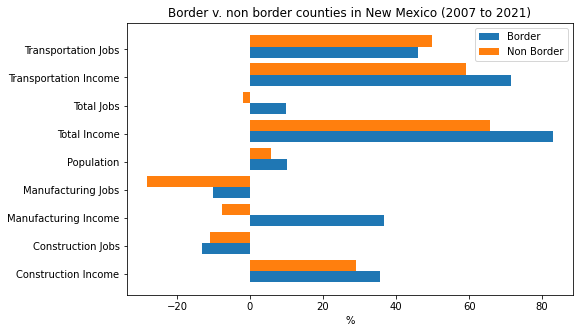

In [140]:
# Datos de las series 
serie1 = dfsummary_nm['Border']
serie2 = dfsummary_nm['Non Border']

# Crear los índices para las barras
ind = np.arange(len(dfsummary_nm['Border']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary_nm['Border'], height=0.4, align='center', label='Border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary_nm['Non Border'], height=0.4, align='edge', label='Non Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Border v. non border counties in New Mexico (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary_bor["Description"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

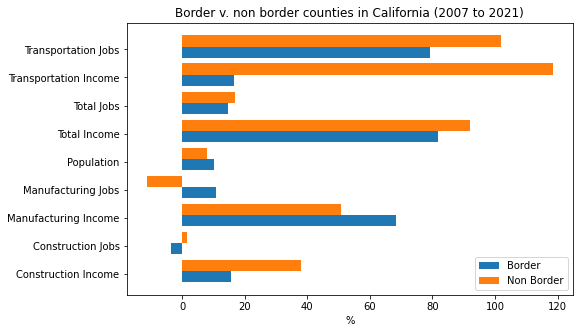

In [141]:
# Datos de las series 
serie1 = dfsummary_cal['Border']
serie2 = dfsummary_cal['Non Border']

# Crear los índices para las barras
ind = np.arange(len(dfsummary_cal['Border']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary_cal['Border'], height=0.4, align='center', label='Border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary_cal['Non Border'], height=0.4, align='edge', label='Non Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Border v. non border counties in California (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary_bor["Description"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

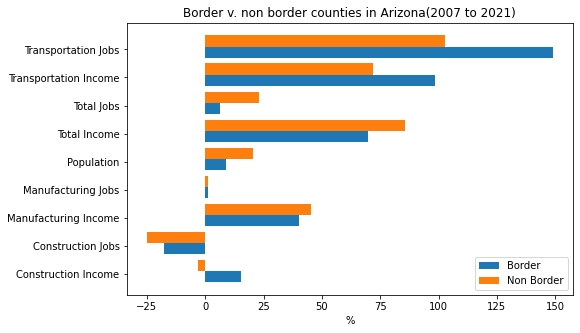

In [142]:
# Datos de las series 
serie1 = dfsummary_ar['Border']
serie2 = dfsummary_ar['Non Border']

# Crear los índices para las barras
ind = np.arange(len(dfsummary_ar['Border']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary_ar['Border'], height=0.4, align='center', label='Border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary_ar['Non Border'], height=0.4, align='edge', label='Non Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Border v. non border counties in Arizona(2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary_bor["Description"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

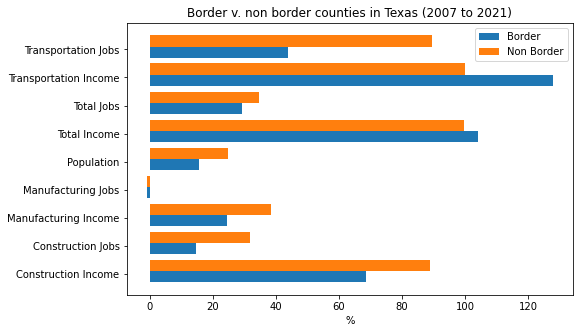

In [143]:
# Datos de las series 
serie1 = dfsummary_tx['Border']
serie2 = dfsummary_tx['Non Border']

# Crear los índices para las barras
ind = np.arange(len(dfsummary_tx['Border']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary_tx['Border'], height=0.4, align='center', label='Border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary_tx['Non Border'], height=0.4, align='edge', label='Non Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Border v. non border counties in Texas (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary_bor["Description"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Jobs

### California

In [ ]:
dfchange_nonborder_cal = dfchange_nonborder.query("State == 'California'")

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Income

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Total Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Income non border")
ax.plot(x2, y2, marker = "o", label = "Total Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Manufacturing Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Manufacturing Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income border")
ax.plot(x3, y3, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x4, y4, marker = "o", label = "Manufacturing jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Transportation Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Transportation Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income non border")
ax.plot(x2, y2, marker = "o", label = "Transportation Income border")
ax.plot(x3, y3, marker = "o", label = "Transportation jobs non border")
ax.plot(x4, y4, marker = "o", label = "Transportation jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Construction Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Construction Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Income non border")
ax.plot(x2, y2, marker = "o", label = "Construction Income border")
ax.plot(x3, y3, marker = "o", label = "Construction jobs non border")
ax.plot(x4, y4, marker = "o", label = "Construction jobs border")

ax.legend()

# plt.show()

### Post 2015

In [ ]:
#Calculate percentage changes border
dfchange_border1621 = dfpivot_border.copy()
dfchange_border1621['Construction Jobs'] = dfchange_border1621['Construction Jobs'] / dfchange_border1621['Construction Jobs'].iat[9] * 100 
dfchange_border1621['Construction Income'] = dfchange_border1621['Construction Income'] / dfchange_border1621['Construction Income'].iat[9] * 100
dfchange_border1621["Manufacturing Jobs"] = dfchange_border1621["Manufacturing Jobs"] / dfchange_border1621["Manufacturing Jobs"].iat[9] * 100
dfchange_border1621["Manufacturing Income"] = dfchange_border1621["Manufacturing Income"] / dfchange_border1621["Manufacturing Income"].iat[9] * 100
dfchange_border1621["Transportation Jobs"]= dfchange_border1621["Transportation Jobs"] / dfchange_border1621["Transportation Jobs"].iat[9] * 100
dfchange_border1621["Transportation Income"] = dfchange_border1621["Transportation Income"] / dfchange_border1621["Transportation Income"].iat[9] * 100
dfchange_border1621["Population"] = dfchange_border1621["Population"] / dfchange_border1621["Population"].iat[9] * 100
dfchange_border1621["Total Jobs"] = dfchange_border1621["Total Jobs"] / dfchange_border1621["Total Jobs"].iat[9] * 100 
dfchange_border1621["Total Income"]  = dfchange_border1621["Total Income"] / dfchange_border1621["Total Income"].iat[9] * 100
dfchange_border1621["Year"] = dfchange_border1621.index

In [ ]:
dfchange_border1621 = dfchange_border1621.query("Year > 2015")
dfchange_border1621

In [ ]:
#Calculate percentage changes border
dfchange_nonborder1621 = dfpivot_nonborder.copy()
dfchange_nonborder1621['Construction Jobs'] = dfchange_nonborder1621['Construction Jobs'] / dfchange_nonborder1621['Construction Jobs'].iat[9] * 100 
dfchange_nonborder1621['Construction Income'] = dfchange_nonborder1621['Construction Income'] / dfchange_nonborder1621['Construction Income'].iat[9] * 100
dfchange_nonborder1621["Manufacturing Jobs"] = dfchange_nonborder1621["Manufacturing Jobs"] / dfchange_nonborder1621["Manufacturing Jobs"].iat[9] * 100
dfchange_nonborder1621["Manufacturing Income"] = dfchange_nonborder1621["Manufacturing Income"] / dfchange_nonborder1621["Manufacturing Income"].iat[9] * 100
dfchange_nonborder1621["Transportation Jobs"]= dfchange_nonborder1621["Transportation Jobs"] / dfchange_nonborder1621["Transportation Jobs"].iat[9] * 100
dfchange_nonborder1621["Transportation Income"] = dfchange_nonborder1621["Transportation Income"] / dfchange_nonborder1621["Transportation Income"].iat[9] * 100
dfchange_nonborder1621["Population"] = dfchange_nonborder1621["Population"] / dfchange_nonborder1621["Population"].iat[9] * 100
dfchange_nonborder1621["Total Jobs"] = dfchange_nonborder1621["Total Jobs"] / dfchange_nonborder1621["Total Jobs"].iat[9] * 100 
dfchange_nonborder1621["Total Income"]  = dfchange_nonborder1621["Total Income"] / dfchange_nonborder1621["Total Income"].iat[9] * 100
dfchange_nonborder1621["Year"] = dfchange_nonborder1621.index

In [ ]:
dfchange_nonborder1621 = dfchange_nonborder1621.query("Year > 2015")
dfchange_nonborder1621

## Jobs

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Income

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Income non border")
ax.plot(x2, y2, marker = "o", label = "Total Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Income non border")
ax.plot(x2, y2, marker = "o", label = "Construction Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [ ]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income non border")
ax.plot(x2, y2, marker = "o", label = "Transportation Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [ ]:
#Summary

In [ ]:
dftotal = pd.pivot_table(df.query("Year > 2006 & Year < 2022") , values='Value', index='Year', columns=['Description',"Border County"])
dftotal

In [ ]:
descriptions = df["Description"].unique()
descriptions

In [ ]:
dftotalchange = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[0] * 100 -100

In [ ]:
dftotalchange["Year"] = dftotalchange.index
dftotalchange

In [ ]:
dftotalchange_melted = pd.melt(dftotalchange, id_vars=["Year"]).copy()
dftotalchange_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange_melted

In [ ]:
dfsummary = pd.pivot_table(dftotalchange_melted.query("Year == 2021") , values='Change', index='Description', columns='Border County')
dfsummary

In [ ]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary['No']
serie2 = dfsummary['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Wages and Population by border and non states (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions (to do)
For the period 2007 to 2021, the southern border had better economic performance than the rest of the country. This is a period that coincides with the beginning of long-term reshoring and nearshoring (and does not consider the drop in activity due to the 2008 crisis).

There was a higher increase in both employment (23%) and the wage bill (86%) in the border states than in the non-border states (12% employment and 58% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased 107% and wages 120% in the border states. In the non-border states, employment increased by 67% and wages by 71%.

In construction, employment on the border increased by 9% and wages by 54%, while in non-border areas employment did not vary (in the total period) and the wage bill increased by 43%. It is worth clarifying that the comparison with 2007 includes a slump due to the crisis and a rapid recovery thereafter.

In manufacturing, there was an 8% drop in employment at the border and a 47% increase in wages. Non-border employment also fell, by 7%, and wages rose less, by 27%.

Relative to population, total employment on the border grew considerably faster. In the non-border states, it also increased, but at a slightly higher rate than population growth.

Construction grew less than the population in the total period but included a sharp drop starting in 2008.

Transportation jobs skyrocketed more than the population, both on and off the border. But faster at the border.

Manufacturing employment grew less than the population in both cases. Includes a 2008 collapse.

Total wages (the sum) grew faster than employment nationally but at a higher rate at the border. This means that the average wage also grew.

This was repeated in all sectors analyzed. 

Transportation saw an increase almost equal. So there was no increase in the average wage.


### Post 2015

In [ ]:
dftotalchange1621 = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange1621[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[9] * 100 -100
        

In [ ]:
dftotalchange1621["Year"] = dftotalchange1621.index
dftotalchange1621

In [ ]:
dftotalchange1621_melted = pd.melt(dftotalchange1621, id_vars=["Year"]).copy()
dftotalchange1621_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange1621_melted

In [ ]:
dfsummary1621 = pd.pivot_table(dftotalchange1621_melted.query("Year == 2021") , values='Change', index='Description', columns='Border County')
dfsummary1621

In [ ]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary1621['No']
serie2 = dfsummary1621['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary1621['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary1621['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Income and Population by border and non states (2016 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary1621.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions
For the period 2016 to 2021, there was also better economic performance in the south than in the rest of the country. This is a period of increasing tension between China and the America. It is expected that nearshoring and reshoring will accelerate thereafter.

Employment (7%) and wages  (37%) increased more in the border states than outside the border states (4% employment and 26% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased by 47% and wages by 56% on the border. In non-border states, employment increased by 38% and wages by 34%.

In construction, border employment increased by 15% and wages by 34%. In non-border states, employment increased by 12% (in the total period) and wages rose by 30%.

Manufacturing employment outside the border increased faster (3%) but wages did not (19%). At the border, employment increased by less than 1% and wages by 29%.

Total wages (the sum) grew faster than employment than the population both on and off the border. This means that the average wage has increased. Border states registered more significant increases than non-border states.

Border states' jobs grew faster than the population. In the non-border states, workers increased as well, but slightly faster than population growth. This includes the sharp drop due to the pandemic.

Construction jobs rise more than the population, both on and off the border. Border states grew faster.

Something similar happened in transportation but on a significantly larger scale.

Manufacturing employment was uneven. Compared to the population, it grew less on the border, whereas it grew similarly in non-border states. 